In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
# import imageio
import torch
from PIL import Image

# Clear the cache
torch.cuda.empty_cache()

### Function Tests

Use these to test if your implementation of functions in GMM work as expected. See [Using the Local Tests](#using_local_tests) for more details.


(-0.5, 255.5, 255.5, -0.5)

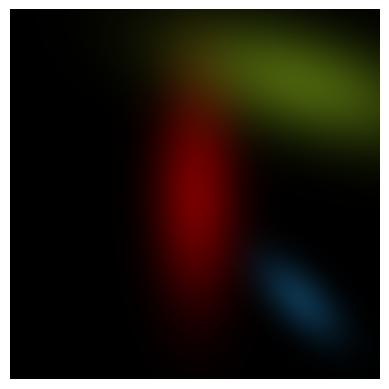

In [2]:
from src.Gaussian2D import construct_2DGS
pos = torch.arange(256**2)
pos_r = pos // 256
pos_c = pos % 256
pos = torch.stack((pos_r, pos_c), dim=-1)
pos = pos.float() / 256.

mu = torch.tensor([
    [128., 128.],
    [50., 200.],
    [200., 200.]
]) / 256.

# scales = torch.tensor([
#     [10., 5.]
# ])

# thetas = torch.tensor([0.523])

sigma_x = torch.tensor([50., 30., 20.]) / 256.

sigma_y = torch.tensor([20., 60., 20.]) / 256.

rho = torch.tensor([0., 0.5, 0.6])

color = torch.tensor([
    [255., 0., 0.],
    [150., 200., 25.],
    [25., 100., 150.]
]) / 255.

# alpha = torch.tensor([1.])

sample_img = construct_2DGS(pos, mu, sigma_x, sigma_y, rho, color)
sample_img = sample_img.reshape(256, 256, 3)

plt.imshow(sample_img.detach().numpy())
plt.axis("off")

In [3]:
from src.Gaussian2D import Gaussian2D

In [4]:
# helper function for performing pixel clustering.
# def GaussianSplatting(image, K, max_iters):
#     """Clusters pixels in the input image

#     Args:
#         image: input image of shape(H, W, 3)
#         K: number of components
#     Return:
#         clustered_img: image of shape(H, W, 3) after pixel clustering
#     """
#     image = image.astype(np.float32)
#     gs_img, iter_list, loss_list = Gaussian2D(image, K=K, max_iters=max_iters, lr=1)()

#     return gs_img


# helper function for plotting images. You don't have to modify it
def plot_images(img_list, title_list, figsize=(20, 10)):
    assert len(img_list) == len(title_list)
    fig, axes = plt.subplots(1, len(title_list), figsize=figsize)
    for i, ax in enumerate(axes):
        ax.imshow(img_list[i])
        ax.set_title(title_list[i])
        ax.axis("off")

def plot_loss(iter_list, loss_list):
    plt.figure(figsize=(10, 5))
    plt.plot(iter_list, loss_list, marker='o', linestyle='-')
    plt.xlabel('Iteration')
    plt.ylabel('Training Loss')
    plt.title('Training Loss vs. Iteration')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
    plt.grid(True)
    plt.show()

iter 99, loss: 0.2195: 100%|█████████████████████████████████████████████████| 100/100 [32:31<00:00, 19.51s/it]


Final scales: 
Parameter containing:
tensor([0.1178, 0.1686, 0.1545, 0.0933, 0.1598, 0.1443, 0.1515, 0.1002, 0.1643,
        0.1241, 0.0854, 0.1521, 0.1594, 0.1453, 0.0941, 0.0840, 0.1634, 0.1510,
        0.1462, 0.0895, 0.0992, 0.1728, 0.1122, 0.1552, 0.0928, 0.1372, 0.1729,
        0.1722, 0.0834, 0.1756, 0.1720, 0.0858, 0.1020, 0.1133, 0.1277, 0.1366,
        0.0989, 0.1666, 0.0901, 0.1448, 0.1546, 0.1154, 0.1740, 0.1081, 0.1540,
        0.1665, 0.0956, 0.1540, 0.1133, 0.1258, 0.1538, 0.1631, 0.1317, 0.1347,
        0.1460, 0.1275, 0.1367, 0.1211, 0.0833, 0.1014, 0.1283, 0.1280, 0.1011,
        0.0833, 0.1737, 0.0969, 0.1295, 0.1475, 0.0908, 0.0879, 0.1033, 0.1448,
        0.1731, 0.1691, 0.1248, 0.1209, 0.1670, 0.1041, 0.1356, 0.0864, 0.1763,
        0.1400, 0.1132, 0.0909, 0.1217, 0.1361, 0.1449, 0.1034, 0.1022, 0.1541,
        0.1777, 0.1262, 0.0829, 0.1732, 0.0996, 0.1075, 0.1662, 0.1089, 0.0963,
        0.1168, 0.1246, 0.1142, 0.0869, 0.1081, 0.1203, 0.0843, 0.0989, 0.0890,
   

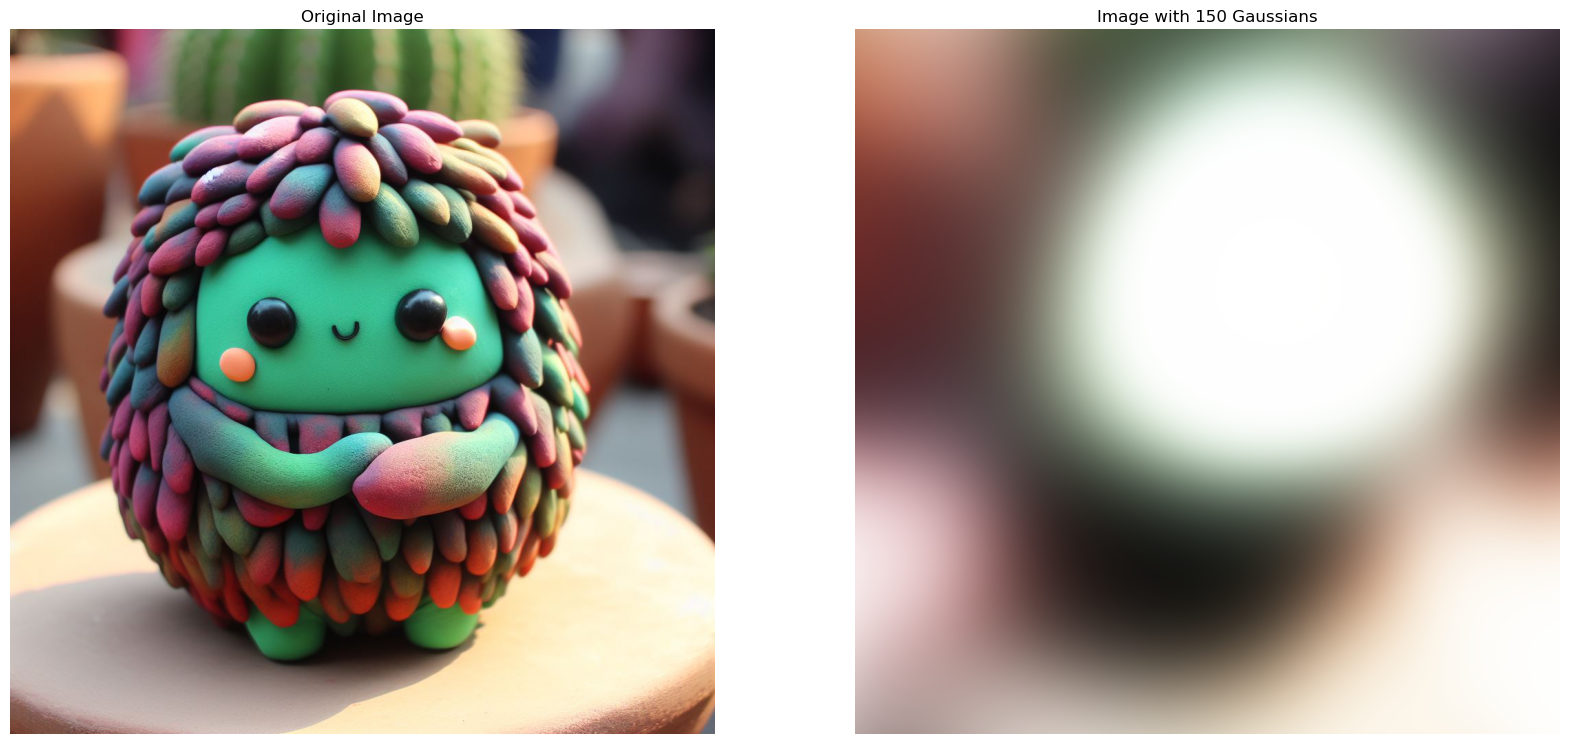

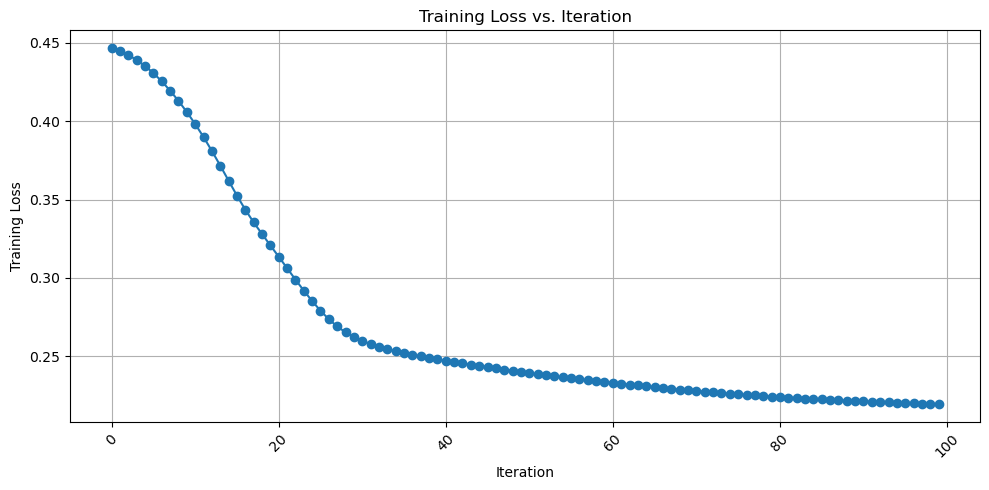

In [7]:
# the direction of two images. Both of them are from ImageNet
img1_dir = "./data/images/anakin-its-working-medium.png"
img2_dir = "./data/images/gmm-example4.png"
img3_dir = "./data/images/dog.png"
img4_dir = "./data/images/smiling.png"

# example of loading image
# image1 = imageio.imread("./data/images/gmm-example1.png")


# this is for you to implement
def perform_GS(image, num_GS=100, max_iters=50):
    """
    Using the helper function above to find the optimal number of clusters that can appropriately produce a single image.
    You can simply examine the answer based on your visual inspection (i.e. looking at the resulting images) or provide any metrics you prefer.

    Args:
        image: input image of shape(H, W, 3)
        min_clusters, max_clusters: the minimum and maximum number of clusters you should test with. Default are 5 and 15.
        (Usually the maximum number of clusters would not exeed 15)

    Return:
        plot: comparison between original image and image pixel clustering.
        optional: any other information/metric/plot you think is necessary.

    UNDERGRADS HINT: set full_matrix = False when using the helper functions
    """

    # TODO: Finish this function
    image_list = [image]
    title_list = ["Original Image"]
    image = image.astype(np.float32)
    gs_img, iter_list, loss_list = Gaussian2D(image, K=num_GS, max_iters=max_iters, lr=1.0, momentum=0.2)()
    image_list.append(gs_img)
    title_list.append(f"Image with {num_GS} Gaussians")
    plot_images(image_list, title_list)
    plot_loss(iter_list, loss_list)


# image = imageio.v2.imread(img2_dir)
image = Image.open(img4_dir)
image = image.convert('RGB')
image = np.array(image) / 255.
perform_GS(image, 150, 100)

# image2 = imageio.imread(img2_dir)
# perform_compression(image2, 5, 10)